In [96]:
!pip install librosa


In [97]:
import matplotlib.pyplot as plt

In [98]:
%matplotlib inline

In [99]:
pwd

'C:\\Users\\PCS\\audio classification'

In [100]:
filename='UrbanSound8K/14387-9-0-11.wav'

In [101]:
import IPython.display as ipd
import librosa
import librosa.display

In [102]:
!pip install resampy
import resampy


In [103]:
import resampy

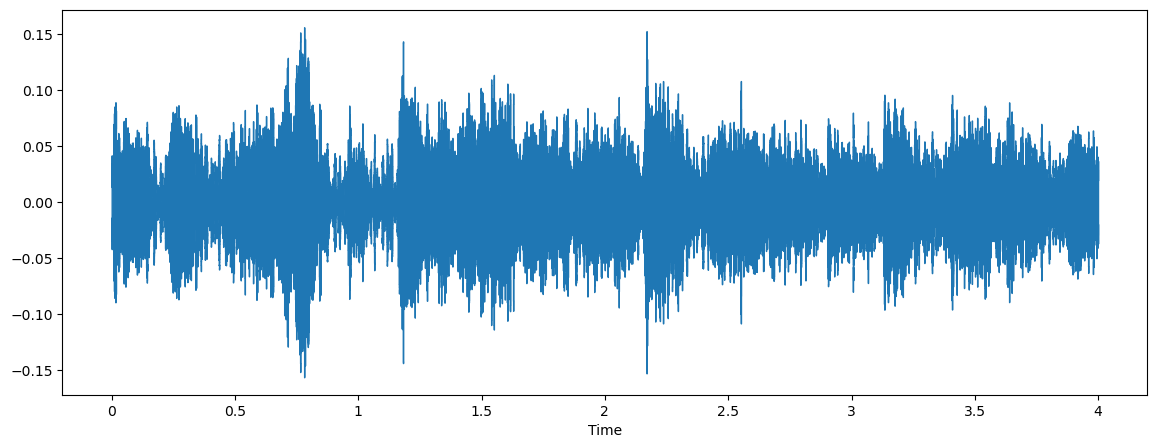

In [104]:
##Music
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)


In [105]:
sample_rate

22050

In [106]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio=wav.read(filename)

In [107]:
wave_sample_rate

44100

In [108]:
import pandas as pd 
metadata= pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [109]:
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [110]:
#Data preprocessing

In [111]:
#read with librosa
librosa_audio_data,librosa_sample_rate=librosa.load(filename)
print(librosa_audio_data)

[-0.03151665 -0.04181669 -0.03214198 ...  0.02601472  0.03171404
  0.03680324]


In [112]:
#read with scipy
wave_sample_rate,wave_audio=wav.read(filename)

In [113]:
wave_audio

array([[ -961, -1860],
       [ -862, -1811],
       [ -786, -1737],
       ...,
       [ 1684,   586],
       [ 1719,   569],
       [ 1690,   548]], dtype=int16)

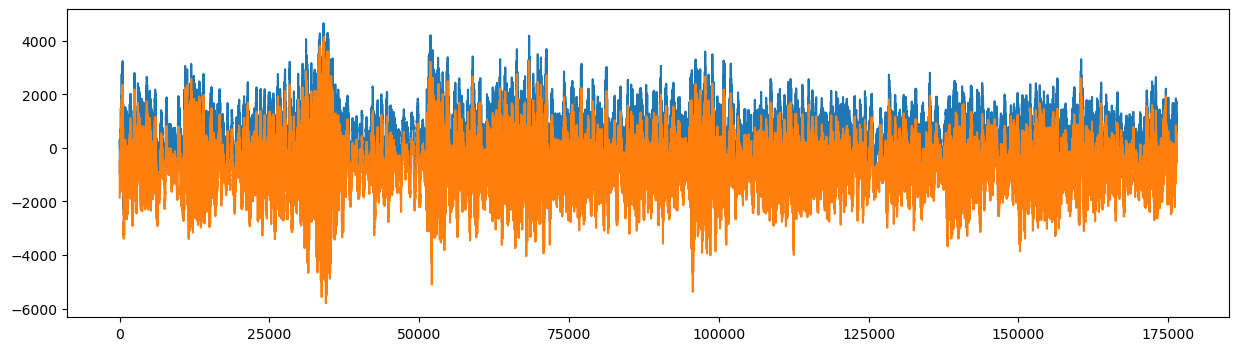

In [114]:
plt.figure(figsize=(15,4))
plt.plot(wave_audio)

In [115]:
!pip install --upgrade librosa


In [116]:
#Extract Feautures MFCC

In [117]:
mfccs=librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate,n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [118]:
print(mfccs)

[[-3.0242349e+02 -2.8226953e+02 -2.7879248e+02 ... -3.6014774e+02
  -3.4396649e+02 -3.1281476e+02]
 [ 1.2904672e+02  1.4047141e+02  1.3765875e+02 ...  1.4510507e+02
   1.3816653e+02  1.2117024e+02]
 [-3.3329105e+00 -2.1878147e+01 -4.3879631e+01 ... -2.0012825e+01
  -1.8800129e+01 -8.6936226e+00]
 ...
 [-7.1821966e+00 -8.5149803e+00 -6.1617899e-01 ... -6.4901185e-01
   1.1337407e+00  6.2545562e-01]
 [ 1.2609863e-01 -6.4307952e-01  6.1723280e+00 ... -6.6891003e-01
   2.4171767e+00  3.2161517e+00]
 [ 2.3726678e+00  1.1211526e+00  3.5226524e-01 ...  4.4163127e+00
   7.8922443e+00  4.9165263e+00]]


In [119]:
import os
audio_path='UrbanSound8K/audio/'
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [120]:
metadata.shape

(8732, 8)

In [121]:

def feature_extractor(file_name):
    audio, sample_rate = librosa.load(file_name)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfcc_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfcc_scaled_features


In [122]:
from tqdm import tqdm
import numpy as np
#iterate through every audio file and extract mfcc feautres
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name= os.path.join(os.path.abspath(audio_path),'fold'+ str(row['fold'])+ '/' ,row["slice_file_name"])
    final_class_labels=row["class"]
    data=feature_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [01:41, 33.48it/s]C:\Users\PCS\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8321it [03:44, 50.01it/s]C:\Users\PCS\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8327it [03:45, 51.38it/s]C:\Users\PCS\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [03:54, 37.29it/s]


In [123]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['features','class'])
extracted_features_df.head()

,features,class
0,"[-211.93698, 62.581207, -122.81313, -60.745293...",dog_bark
1,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.578068, 43.19586, ...",children_playing
3,"[-406.47922, 91.1966, -25.043558, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86223, -42.658787, 50.690277,...",children_playing


In [124]:
extracted_features_df.shape

(8732, 2)

In [125]:
x=np.array(extracted_features_df['features'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [126]:
x.shape

(8732, 40)

In [128]:
#y=np.array(pd.get_dummies(y))
#y.shape
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train

In [ ]:
x_train.shape

model Creation


In [ ]:
!pip install tensorflow

In [130]:
import tensorflow as tf

In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [132]:
num_labels=y.shape[1]

In [133]:
model=Sequential()
#first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#thirdLayer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#final Layer
model.add(Dense(num_labels))
model.add(Activation("softmax"))

C:\Users\PCS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [134]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [135]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [137]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6821 - loss: 0.9684
Epoch 1: val_loss improved from inf to 0.78266, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6821 - loss: 0.9684 - val_accuracy: 0.7624 - val_loss: 0.7827
Epoch 2/100
203/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6841 - loss: 0.9636
Epoch 2: val_loss improved from 0.78266 to 0.76555, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6839 - loss: 0.9639 - val_accuracy: 0.7728 - val_loss: 0.7655
Epoch 3/100
208/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6790 - loss: 0.9584
Epoch 3: val_loss did not improve from 0.76555
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6791 - loss: 0.9579 - val_accuracy: 0.7682 - val_loss: 0.7703
Epoch 4/100
215/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6809 - loss: 0.9382
Epoch 4: val_loss improved from 0.76555 to

In [138]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[1])

0.7979393005371094


In [145]:
filename='UrbanSound8K/dog.wav'


In [140]:
predicted_classes = np.argmax(model.predict(extF), axis=1)

print(predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[2]


In [141]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [147]:
audio, sample_rate = librosa.load(filename) 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=np.argmax(model.predict(mfccs_scaled_features), axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-2.2841142e+02  1.6160143e+02 -1.4506719e+01 -2.1547791e+01
 -1.2517634e+01  2.8144283e+00  2.2249105e+00  1.1287838e+00
 -1.3636453e+01  2.1786969e+00  2.0951045e+00  1.6686380e+01
 -5.9124357e-01  1.1685464e+01  1.6754629e+01  6.5655770e+00
 -2.9093077e+00  1.0338130e+01 -3.2480373e+00  1.5136213e+00
 -1.9621696e+00 -3.3184826e+00 -4.8638906e+00  6.9273210e+00
  3.1841668e-01  1.6056446e+00 -9.4735020e-01 -2.9233611e+00
 -2.0148628e+00 -3.6087215e+00 -5.5569229e+00 -1.5137597e+00
 -2.0663483e+00  6.4163551e+00  3.9802148e+00  2.3062656e+00
  2.1243787e-01 -2.3680089e+00 -7.5802693e+00 -2.4187512e+00]
[[-2.2841142e+02  1.6160143e+02 -1.4506719e+01 -2.1547791e+01
  -1.2517634e+01  2.8144283e+00  2.2249105e+00  1.1287838e+00
  -1.3636453e+01  2.1786969e+00  2.0951045e+00  1.6686380e+01
  -5.9124357e-01  1.1685464e+01  1.6754629e+01  6.5655770e+00
  -2.9093077e+00  1.0338130e+01 -3.2480373e+00  1.5136213e+00
  -1.9621696e+00 -3.3184826e+00 -4.8638906e+00  6.9273210e+00
   3.1841668e-01 

array(['dog_bark'], dtype='<U16')